In [1]:
#!/usr/bin/env python
# Copyright (c) 2020 - The Procedural Generation for Gazebo authors
# For information on the respective copyright owner see the NOTICE file
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
%env GAZEBO_MODEL_PATH=/home/agusmazzeo/.gazebo/models
import os
from tqdm import tqdm
import geopandas as gpd
import argparse
import datetime
from pcg_gazebo.simulation import SimulationModel, \
    add_custom_gazebo_resource_path
from pcg_gazebo.generators.creators import extrude
from pcg_gazebo.generators.shapes import random_rectangles, \
    random_rectangle, random_points_to_triangulation, rectangle
from pcg_gazebo.generators import WorldGenerator
from shapely.geometry import shape, Polygon, MultiPolygon, box as Box, MultiLineString



env: GAZEBO_MODEL_PATH=/home/agusmazzeo/.gazebo/models


In [6]:
!python3.8 -m pip install rasterio

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 13.2 MB/s eta 0:00:00m eta 0:00:010:00:01
--- Logging error ---
Traceback (most recent call last):
  File "/home/ramiro/.local/lib/python3.8/site-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/home/ramiro/.local/lib/python3.8/site-packages/pip/_vendor/rich/console.py", line 1752, in print
    extend(render(renderable, render_options))
  File "/home/ramiro/.local/lib/python3.8/site-packages/pip/_vendor/rich/console.py", line 1390, in render
    for render_output in iter_render:
  File "/home/ramiro/.local/lib/python3.8/site-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/home/ramiro/.local/lib/python3.8/site-packages/pip/_vendor/rich/segment.py", line 245, in split_lines
    for segment in segments

In [190]:
from shapely.geometry import Polygon, LineString, MultiLineString
import rasterio.features
import shapely
import matplotlib.pyplot as plt
from FrontierExploration.preprocessing.grid.occupancy_grid import OccupancyGrid
import numpy as np
num_rays = 16
ALLOWED_MOVEMENTS = [(np.cos(angle), np.sin(angle)) for angle in np.linspace(0, 2 * np.pi, num=num_rays, endpoint=False)]

In [3]:
wall_lines_transformed = shapely.affinity.affine_transform(wall_lines.buffer(0.5), [20 ,0 , 0, 20, 0 ,0 ])

# (minx, miny, maxx, maxy)
bounds = wall_lines_transformed.bounds

# [a, b, d, e, xoff, yoff]
tf_to_zero = [1, 0, 0, 1, -bounds[0], -bounds[1]]
img_size = (int(bounds[3] - bounds[1]), int(bounds[2] - bounds[0]))
wall_lines_transformed = shapely.affinity.affine_transform(wall_lines_transformed, tf_to_zero)

img = rasterio.features.rasterize([wall_lines_transformed], out_shape=img_size, fill=0, default_value=100)
# img [200:] = 50
plt.imshow(img)

# print(img)

NameError: name 'shapely' is not defined

In [307]:
from rasterio.features import shapes

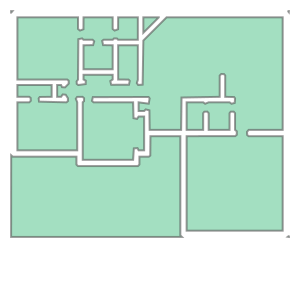

In [300]:
shape = None
for s in shapes(img):
    # print(s[0]["coordinates"])
    if shape is None:
        shape = Polygon(*s[0]["coordinates"])
    try:
        shape = shape.union(Polygon(*s[0]["coordinates"]))
    except:
        # print(s)
        pass

shape.simplify(10)


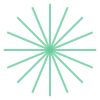

In [321]:
rays = LineString([[0, 0], ALLOWED_MOVEMENTS[0]* 20 * 120])
for movement in ALLOWED_MOVEMENTS:
    rays = rays.union(LineString([[0, 0], movement* 20 * 12]))

rays

In [322]:
rays = shapely.affinity.affine_transform(rays.buffer(1), [1, 0, 0, 1, 1000, 1000])
for ray in rays:
    if ray.coords[0] == inicio:
        visibility += ray.length

SyntaxError: unexpected EOF while parsing (985482952.py, line 2)

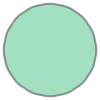

In [319]:
rays.intersection(shape)

In [118]:
grid = OccupancyGrid(0.05, x_cells=img_size[0], y_cells=img_size[1])
grid._grid = img
# grid.plot()
# for cell in raycast:
#     grid[tuple(cell)] = 100
# grid.plot()


In [114]:
raycast = raycast_in_every_direction(start_cell=(50, 50), available_cells=grid.get_empty_cells(), range_in_cells=1, squarify=False, outermost=False)

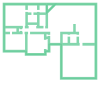

In [266]:
wall_thickness = 0.1
wall_height = 5
world_name = "rect_falop"

block_size = 1
# Create a world generator to place
# objects in the world
world_generator = WorldGenerator()
polygons = []
layout = gpd.read_file(f"{os.getcwd()}/files/small_house_clean.dxf")
wall_lines = layout.unary_union
wall_lines

In [3]:
world_generator.world.add_model(
    tag='ground_plane',
    model=SimulationModel.from_gazebo_model('ground_plane'))
     
# # Retrieve the free space polygon where objects
# # can be placed within the walls
# free_space_polygon = world_generator.world.get_free_space_polygon(
#     ground_plane_models=[walls_model.name],
#     ignore_models=['ground_plane'])
# # Add the workspace constraint to the
# # generator
# world_generator.add_constraint(
#     name='room_workspace',
#     type='workspace',
#     frame='world',
#     geometry_type='polygon',
#     polygon=free_space_polygon
# )

# # Add constraint to place all object
# # tangent to the ground
# world_generator.add_constraint(
#     name='tangent_to_ground_plane',
#     type='tangent',
#     frame='world',
#     reference=dict(
#         type='plane',
#         args=dict(
#             origin=[0, 0, 0],
#             normal=[0, 0, 1]
#         )
#     )
# )

# orientation_dofs = ['yaw']
# models = dict()
# world_generator.add_asset(
#     tag='box',
#     description=dict(
#         type='box',
#         args=dict(
#             size="__import__('numpy').random.uniform(1, 10, 3)",
#             name='cuboid',
#             color='xkcd'
#         )
#     )
# )
# models['box'] = 120

# # Add placement policy
# placement_policy = dict(
#     models=list(models.keys()),
#     config=[
#         dict(
#             dofs=['x', 'y'],
#             tag='workspace',
#             workspace='room_workspace'
#         ),
#         dict(
#             dofs=orientation_dofs,
#             tag='uniform',
#             mean=0,
#             min=-3.141592653589793,
#             max=3.141592653589793
#         )
#     ]
# )

# # Set local constraints
# local_constraints = list()
# for m in models:
#     local_constraints.append(
#         dict(model=m, constraint='tangent_to_ground_plane'))
# # Place objects randomly on the free
# # space within the walls
# world_generator.add_engine(
#     tag='placement_engine',
#     engine_name='random_pose',
#     models=list(models.keys()),
#     max_num=models,
#     model_picker='random',
#     no_collision=True,
#     min_distance=0.0,
#     policies=[placement_policy],
#     constraints=local_constraints
# )
# # Run placement engine
# world_generator.run_engines(attach_models=True)
    
world_generator.world.name = world_name
world_generator.world.show()

SceneViewer(width=1311, height=713)

In [4]:
import sys
# Export world to file and walls model as Gazebo model
export_models_dir = "/home/agusmazzeo/.gazebo/models"
export_world_dir = "/home/agusmazzeo/.gazebo/worlds"
add_custom_gazebo_resource_path(export_models_dir)
print(sys.getsizeof(world_generator))

full_world_filename = world_generator.export_world(
    output_dir=export_world_dir,
    filename=world_generator.world.name + '.world',
    models_output_dir=export_models_dir,
    with_default_sun=False,
    overwrite=True)

print('World file: {}'.format(full_world_filename))

64
World file: /home/agusmazzeo/.gazebo/worlds/rect_falop.world


In [1]:
%env GAZEBO_MODEL_PATH=/home/ramiro/.gazebo/models

import os
from FrontierExploration.preprocessing.layout.reader import LayoutReader

base_dir = os.getcwd()
files_dir = f"{base_dir}/files"

layout_reader = LayoutReader(file_name=f"small_house_polygon", file_extension="dxf", files_dir=f"{files_dir}/")
layout_reader.create_gazebo_model(output_file_dir="~/.gazebo", show=True)

env: GAZEBO_MODEL_PATH=/home/ramiro/.gazebo/models


TopologyException: unable to assign free hole to a shell at -482.77292602758052 -12.632868238436229


ValueError: No Shapely geometry can be created from null value

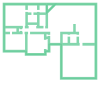

In [3]:
layout_reader.layout.unary_union

In [11]:
import matplotlib.pyplot as plt
import geopandas as gpd

<AxesSubplot:>

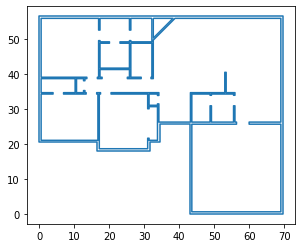

In [13]:
 p = gpd.GeoSeries(layout_reader.layout.unary_union)
p.plot()